In [3]:
# Importing Required Libraries

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [4]:
# Mounting Google Drive where Datasets are available

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# Sample Audio file used to generate Mel Spectrogram

sample_audio_file = '/content/gdrive/My Drive/Dataset/Test/wavs/LJ001-0001.wav'
ipd.Audio(sample_audio_file)

In [9]:
# Loading sample audio file using librosa

signal, sampling_rate = librosa.load(sample_audio_file)     # default sampling rate is 22050 hz

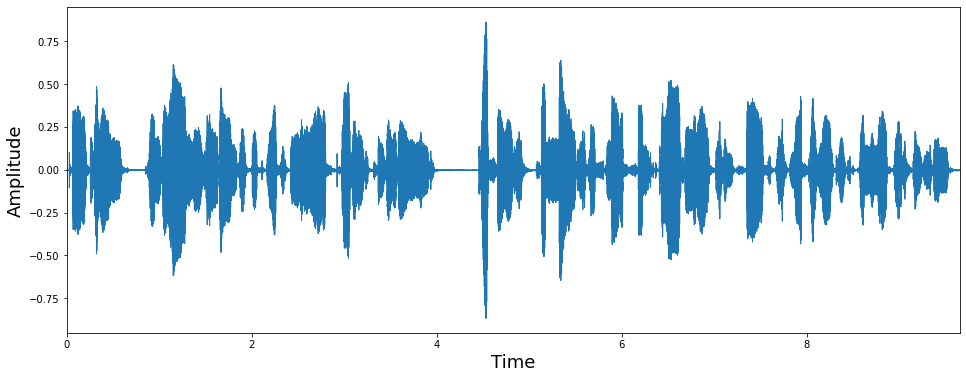

In [14]:
# Visualizing the raw audio signal
%matplotlib inline

plt.figure(figsize=(16, 6))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
librosa.display.waveplot(signal, sr = sampling_rate)

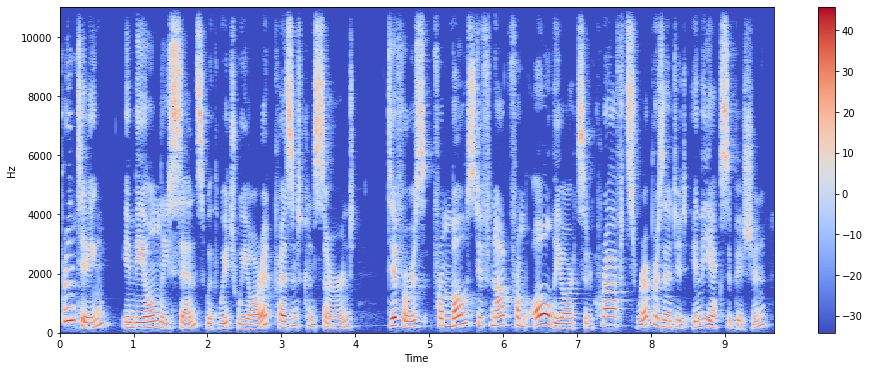

In [18]:
# Converting audio waveform to spectrogram using short term fourier transform (STFT)

spectrogram = librosa.stft(signal)
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
plt.figure(figsize=(16, 6))
librosa.display.specshow(spectrogram_db, sr = sampling_rate,  x_axis = 'time', y_axis = 'hz')
plt.colorbar()

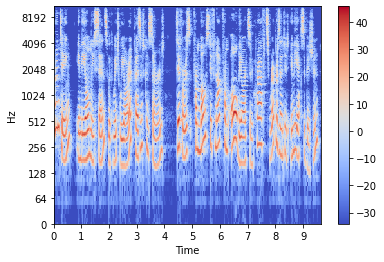

In [24]:
# Since humans percieve in logarithmic scale rather than linear scale

librosa.display.specshow(spectrogram_db, sr = sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

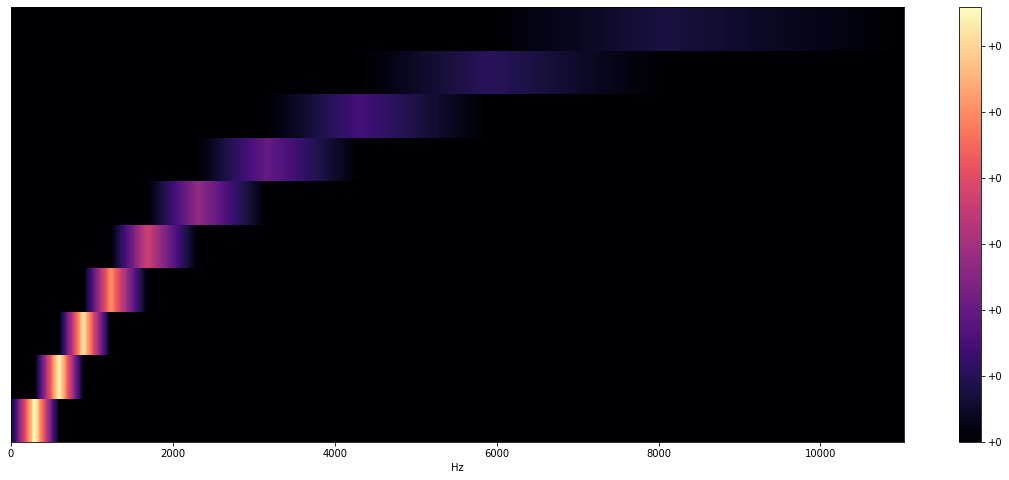

In [20]:
# Mel filter banks for better understanding of the Mel scale

filter_banks = librosa.filters.mel(n_fft = 2048, sr = 22050, n_mels = 10)
plt.figure(figsize=(20, 8))
librosa.display.specshow(filter_banks, sr = sampling_rate, x_axis = "linear")
plt.colorbar(format = "%+2.f")
plt.show()

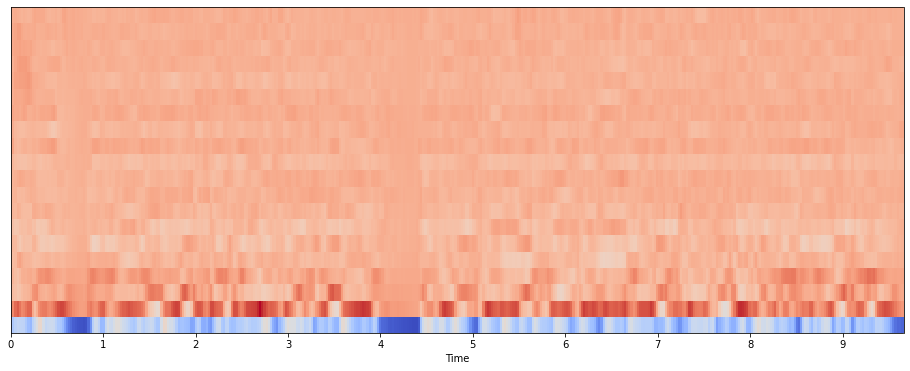

In [32]:
# Visualizing MFCCs

mfccs = librosa.feature.mfcc(signal, sr = sampling_rate)
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr = sampling_rate, x_axis = 'time')

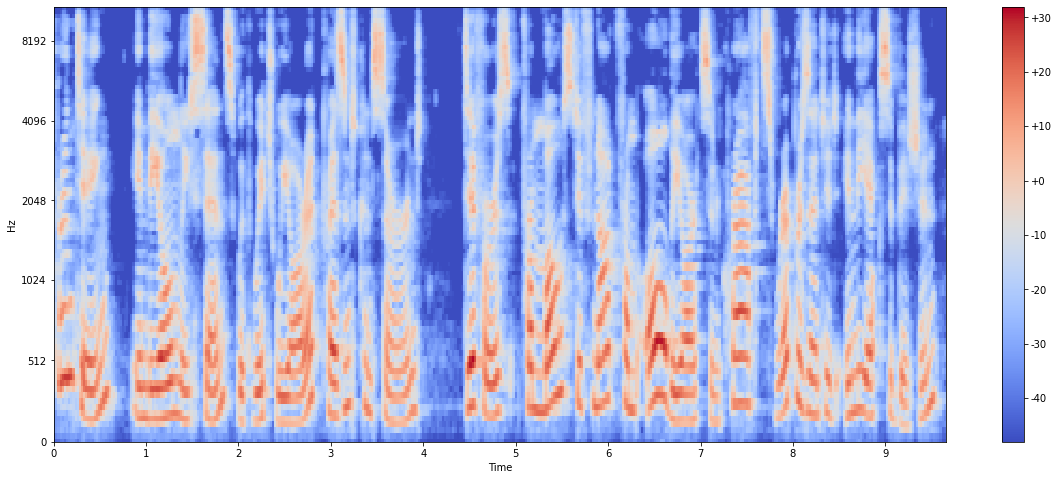

In [28]:
# Generating the Mel Spectrogram
# n_ftt is length of the FFT window, hop_length is the number of samples between successive frames, n_mels is the number of bands that we want.

mel_spectrogram = librosa.feature.melspectrogram(signal, sr = sampling_rate, n_fft = 2048, hop_length = 512, n_mels = 90)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(20, 8))
librosa.display.specshow(log_mel_spectrogram, x_axis = "time", y_axis = "mel", sr = sampling_rate)
plt.colorbar(format="%+2.f")
plt.show()